# **Problem Definition: Customer Segmentation for Marketing Strategy** 
<br><br>

In this project, we aim to address the problem of customer segmentation in a supermarket mall. The dataset at hand contains valuable information about the mall's customers, including their **Customer ID, age, gender, annual income, and a variable called "spending score" that is assigned based on customer behavior and purchasing data**.<br><br>

The primary goal of this analysis is to gain insights into the customer base and identify distinct groups or segments among them. By applying unsupervised machine learning techniques, specifically the **KMeans Clustering Algorithm**, we can effectively cluster customers based on their similarities and differences in age, gender, annual income, and spending score.<br><br>

The significance of customer segmentation lies in its potential to reveal patterns and trends that can guide marketing strategies. By understanding different customer segments, the mall's marketing team can tailor their approach to target specific groups more effectively. This knowledge enables the team to identify the most promising customer segments that are more likely to engage with the mall's offerings and potentially become loyal customers. Consequently, this segmentation analysis will assist in devising marketing strategies that are precisely aligned with the preferences and behaviors of the target customers.<br><br>

Ultimately, the objective is to provide **actionable insights to the marketing team**, allowing them to develop a well-informed and targeted **marketing strategy**. By identifying the customer segments that are most likely to converge and exhibit high engagement, the mall can optimize its resources and efforts, resulting in improved customer satisfaction, increased sales, and overall business growth.<br><br>


## **About the Data**
As mentioned previously the data is open for public in Kaggle, the author of the data is VIJAY CHOUDHARY. 

The data has 200 observations and 5 columns

We have 4 features that are numerical and we have 1 feature that is  categorical data.
<br><br>

## **References**

- [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?datasetId=42674)
- [GitHub Repository for this Notebook](https://github.com/laithrasheed/DTSA-5510-Unsupervised-Algorithms-in-Machine-Learning-Final-Project.git)

In [1]:
import pandas as pd 

## **EDA and Code Cleaning Part**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.describe(include = 'O')

,Gender
count,200
unique,2
top,Female
freq,112


In [8]:
# let's drop the CustomerID columns
df = df.drop(['CustomerID'], axis=1)

In [9]:
# let's check missing values 
df.isna().sum().sum()

0

In [10]:
# let's check duplicated rows
df.duplicated().sum()

0

In [11]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
# Counting the number of unique values in each feature
# The result is sorted in descending order to identify features with the highest variability
df.nunique().sort_values(ascending=False)

Spending Score (1-100)    84
Annual Income (k$)        64
Age                       51
Gender                     2
dtype: int64

In [13]:
# Perform one-hot encoding on the gender feature
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

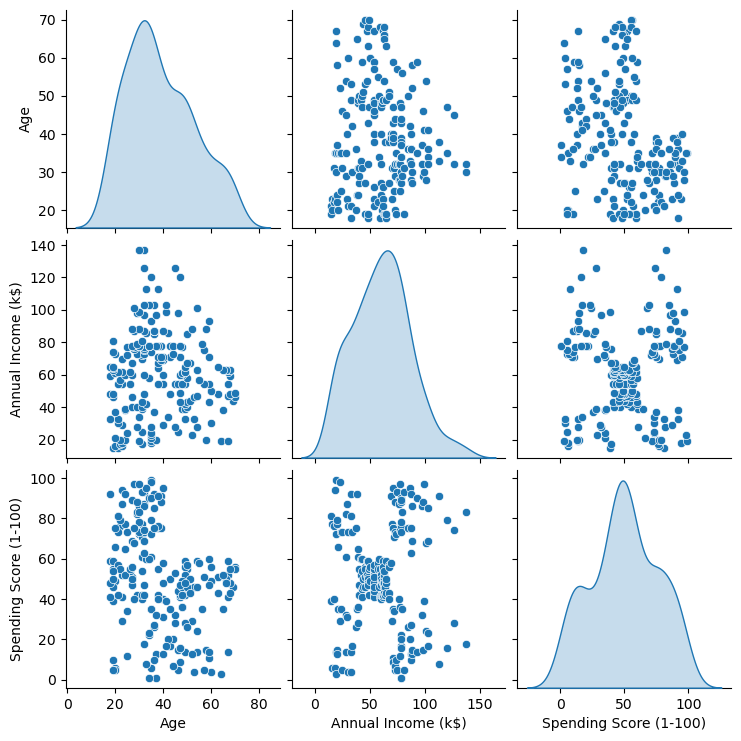

In [14]:
# Importing the seaborn library for data visualization
import seaborn as sns

# Creating a pair plot to visualize the relationships between pairs of variables
# The diagonal elements are represented as KDE (Kernel Density Estimate) plots
sns.pairplot(df, diag_kind='kde')

#### **Data Visualization**

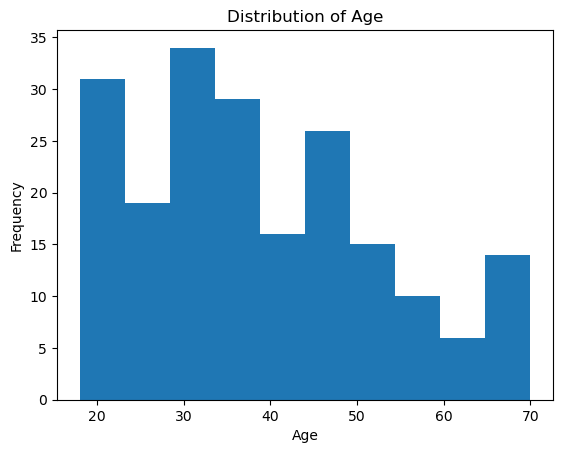

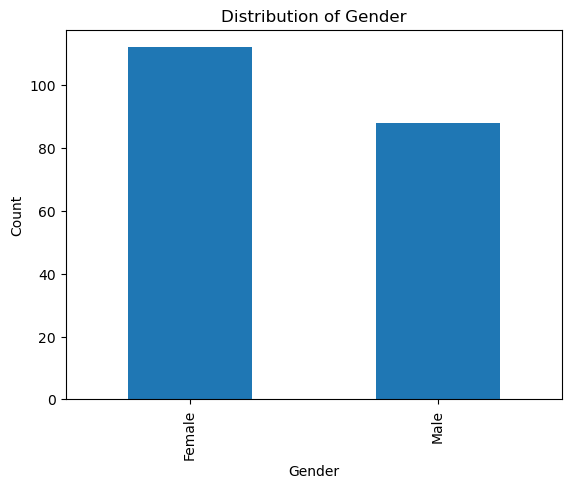

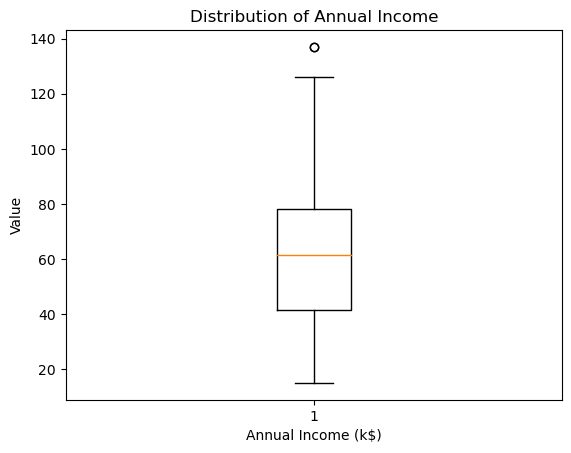

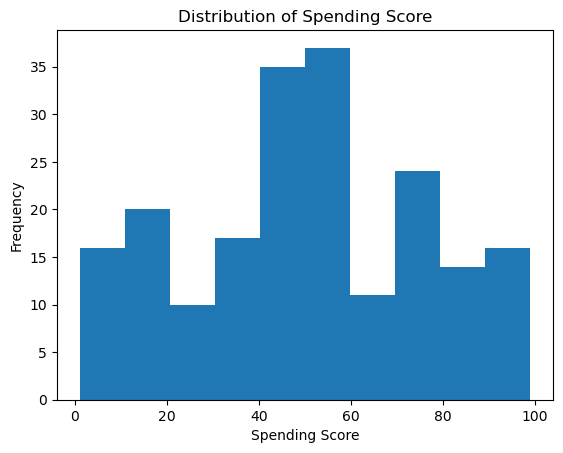

In [15]:
import matplotlib.pyplot as plt

# Histogram of age
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Bar plot of gender
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

# Box plot of annual income
plt.boxplot(df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Value')
plt.title('Distribution of Annual Income')
plt.show()

# Histogram of Spending Score 
plt.hist(df['Spending Score (1-100)'], bins=10)
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()


#### **Features Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale numeric attributes
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

#### **Correlation Analysis**

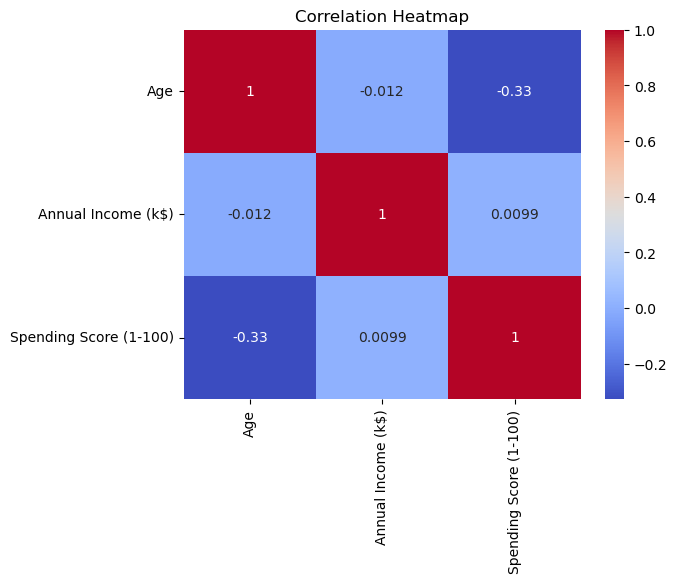

In [17]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### **Dimensionality Reduction**

In [18]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_pca = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

#### **Elbow Method**

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

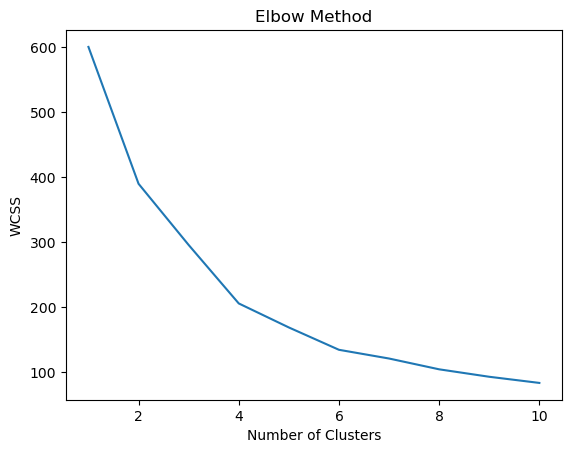

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate within-cluster sum of squares (WCSS) for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

# Plot WCSS against number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## ** Applying KMeans Clustering**

In [20]:
from sklearn.cluster import KMeans

# Instantiate KMeans with the chosen number of clusters
k = 6 # based o nthe elbow method
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans to the customer data
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [21]:
#Assign Cluster Labels: After fitting the KMeans model, we assign cluster
#labels to each customer based on their attributes.

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

[[-0.99396865 -1.34734766  1.06404834]
 [ 1.25472096 -0.24021294 -0.04399777]
 [ 0.22171558  1.08322527 -1.29005223]
 [-0.86515664 -0.13196835 -0.08043031]
 [-0.44191719  0.99158305  1.23950275]
 [ 0.47895722 -1.30822992 -1.19644353]]


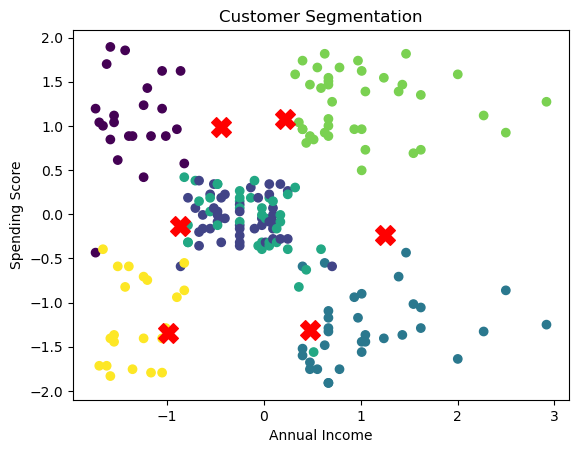

In [22]:
# Cluster centroids (representative customer profiles)
centroids = kmeans.cluster_centers_
print(centroids)

# Visualize the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.savefig('customer_segmentation.png')  # Save the plot as an image
plt.show()

#### **Cluster Analysis**

The last two steps of the process, cluster analysis and interpretation, are crucial for gaining insights and developing effective marketing strategies. These steps require careful analysis and interpretation of the clustering results.<br><br>

While they can be challenging, they provide the most valuable information for understanding customer segments and tailoring marketing efforts.<br><br>

That's why the analysis conclusions below may vary from data scientist to another. However, I believe most of us would agree on the following points:<br><br>

Let's focus on the centroids of each cluster. After experimentation, I am confident that the optimal value for K is 6. If you try changing the K value from 6 to 4, you will likely feel the need to increase the number of clusters.<br><br>

Regarding the centroids, we can try to classify our clusters into three groups, with each group containing 2 clusters. This gives us 2 scenarios to analyze, as follows:<br><br>

Scenario No.1: Clusters are grouped based on the level of Spending Scores, resulting in 3 levels, as shown in the plot below:<br><br>
Level 1: 2 clusters with negative values.<br><br>
Level 2: 2 clusters with neutral values (near zero).<br><br>
Level 3: 2 clusters with positive values.<br><br>

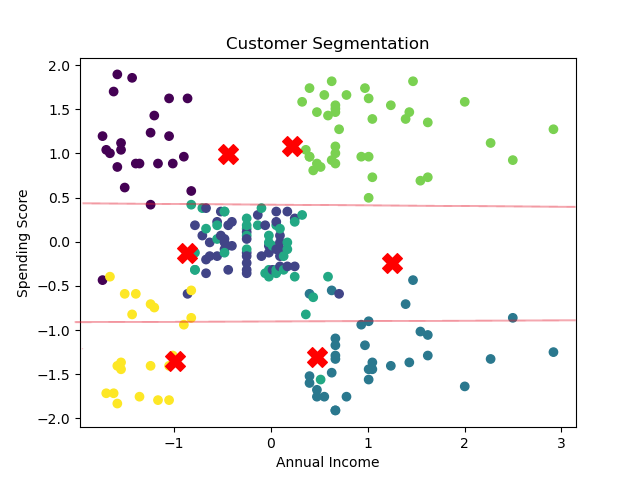

In this scenario, we can conclude that the clusters in the first level are unlikely to spend much in the mall supermarket.<br><br>
The left cluster is expected to have this conclusion due to their low annual income, while the right cluster is not expected to have this conclusion, given their higher annual income. <br><br>
We can focus more on the properties of this cluster and try to identify their needs.<br><br>

Regarding the second level, it is challenging to determine the properties with certainty. The only measure we can focus on here is the annual income.<br><br>

In the third and final level of this scenario, we can observe that the cluster with low annual income has a high spend score. <br><br>
Therefore, we need to maintain their needs in the supermarket mall. Conversely, the second cluster is expected to have high annual income with a high spend score, so our focus should be on maintaining their needs as well.<br><br>

In the second scenario, as shown below, we have two levels:<br><br>

The left level has 3 clusters, all with low annual income but different spending scores.
The right level also has 3 clusters, all with similar high annual income but different spending scores.<br><br>
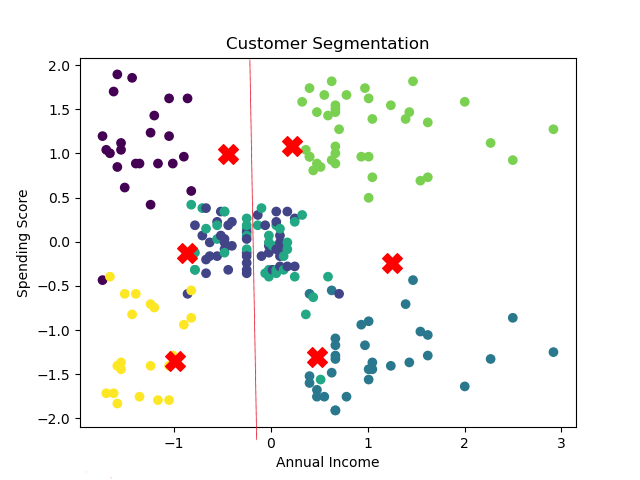